# Finding Lane Lines on the Road - Jack Qian

In [49]:
from pyntcloud import PyntCloud
import numpy as np
import os
import time
import scipy.linalg
import matplotlib.pyplot as plt

define main code of  image process

In [50]:
path_in = "/home/jackqian/avod/make_planes/"
path_kitti = "/home/jackqian/KITTI/training/velodyne/"
path_kitti_testing = "/home/jackqian/KITTI/testing/velodyne/"
path_save = "/media/jackqian/新加卷/Ubuntu/avod/make_planes/"
path_training_bin3 = "/media/jackqian/新加卷/Ubuntu/avod/make_planes/kittilidar_training_qyqmake/"
file1 = "000002.bin"
file2 = "1.bin"

Read in and grayscale the image

In [51]:
def cau_planes():
    """
    using Ransac in PyntCloud to find the groud plane.
    Note the lidar points have transformed to the camera coordinate.
    :return: groud plane parameters (A, B, C, D) for Ax+By+Cz+D=0.
    """

    last_time = time.time()
    cloud = PyntCloud.from_file(path_save + "kittilidar_training_qyqmake/" + file1)
    #print(cloud)
    #cloud.plot()
    
    cloud.points = cloud.points[cloud.points["y"] > 1]
#     cloud.points = cloud.points[cloud.points["x"] > -2]
#     cloud.points = cloud.points[cloud.points["x"] < 2]
#     cloud.points = cloud.points[cloud.points["z"] > -20]
#     cloud.points = cloud.points[cloud.points["z"] < 20]

    is_floor = cloud.add_scalar_field("plane_fit", n_inliers_to_stop=len(cloud.points) / 10, max_dist=0.001, max_iterations=100)
    cloud.plot(use_as_color=is_floor, cmap = "cool")
    

    cloud.points = cloud.points[cloud.points[is_floor] > 0]
    cloud.plot()

    data = np.array(cloud.points)

    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()

    #### best-fit linear plane
    #### Z = C[0] * X + C[1] * Y + C[2]
    A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])]
    C, _, _, _ = scipy.linalg.lstsq(A, data[:, 2])  # coefficients
    Z = C[0] * X + C[1] * Y + C[2]

    normal = np.array([C[0], C[1], 1, C[2]])
    normal = - normal / normal[1]
    print(normal)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', s=1)
    # ax.scatter(data_raw[:, 0], data_raw[:, 1], data_raw[:, 2], c='g', s=5)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    plt.show()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(0.22460870444774628, 7.967355012893677, 118.…

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-2.8857662677764893, 3.205164670944214, 18.8…

[-1.48538310e-02 -1.00000000e+00 -2.36126852e-04  1.54634255e+00]


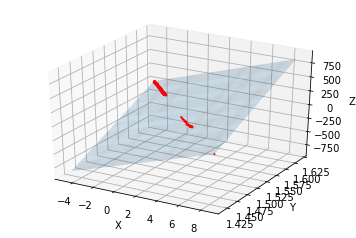

In [52]:
cau_planes()